In [2]:
import numpy as np
import sklearn
from matplotlib import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/artem/Main/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
from sklearn import datasets
N_SAMPLES  = 50
data_tuple = datasets.make_regression(n_samples = N_SAMPLES, n_features = 1, n_targets = 1, noise = 200)
print(data_tuple[1])
print(data_tuple[1].reshape(50,1))

[-302.82847202  -68.34827076  172.90646718  165.4475944  -267.78007735
  244.10372642   56.87714282 -359.09350212 -194.78322987 -114.09439216
 -290.5561838   109.94223599   94.24045915  204.95365587 -159.36183954
 -273.12716565 -272.36610016 -179.33709636  114.49219433 -248.1015069
   91.55436714  282.28222642   -7.33658198  -56.77598072  261.58269245
  150.77915254    7.62323851 -317.65074957 -155.74065115  -56.67253812
   -8.65037069   76.32214355 -325.98014748 -214.90182263   75.07767363
  152.49897918 -105.51190804   70.33698713  162.56769262   63.48186149
  205.3767052   240.62481414  224.42807717  215.79098714   61.60722067
 -458.22004443 -187.25042931  132.316835    352.4527184  -154.66163307]
[[-302.82847202]
 [ -68.34827076]
 [ 172.90646718]
 [ 165.4475944 ]
 [-267.78007735]
 [ 244.10372642]
 [  56.87714282]
 [-359.09350212]
 [-194.78322987]
 [-114.09439216]
 [-290.5561838 ]
 [ 109.94223599]
 [  94.24045915]
 [ 204.95365587]
 [-159.36183954]
 [-273.12716565]
 [-272.36610016]
 

In [110]:
#data = np.hstack((data_tuple[0], data_tuple[1].reshape(50,1)))
data_x_scaled = (data_tuple[0] - data_tuple[0].min() ) / (data_tuple[0].max() - data_tuple[0].min())
data_y = data_tuple[1].reshape(N_SAMPLES, 1)
data_y_scaled = (data_y - data_y.min() ) / (data_y.max() - data_y.min())
data_scaled   = np.hstack((data_x_scaled, data_y_scaled))

In [111]:
data_scaled

array([[0.665559  , 0.62142962],
       [0.68232417, 0.96592954],
       [0.35118904, 0.60569634],
       [0.69229894, 0.56540068],
       [0.32137297, 0.81940009],
       [0.76822957, 0.48351941],
       [0.68654543, 0.69279494],
       [0.53883789, 0.49473404],
       [0.80140243, 0.20305432],
       [0.78497994, 0.29419533],
       [0.76596946, 0.44048168],
       [0.47135828, 0.50986063],
       [0.52570041, 0.68521001],
       [0.26926924, 0.50818615],
       [0.64419739, 0.32605915],
       [0.99053392, 1.        ],
       [0.56232708, 0.27643961],
       [0.68746037, 0.40811427],
       [0.58537933, 0.62450948],
       [0.62072132, 0.64447101],
       [0.62593663, 0.49283707],
       [0.37960279, 0.43924377],
       [0.8675788 , 0.31741734],
       [1.        , 0.63860954],
       [0.        , 0.36378489],
       [0.82874364, 0.14386435],
       [0.66957901, 0.48596694],
       [0.33700528, 0.34161911],
       [0.91195072, 0.38991592],
       [0.37480867, 0.55631211],
       [0.

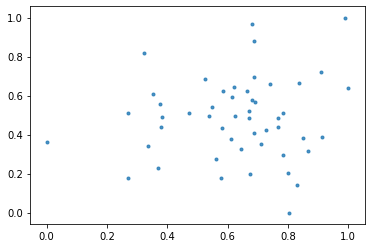

In [113]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.8, marker=".")

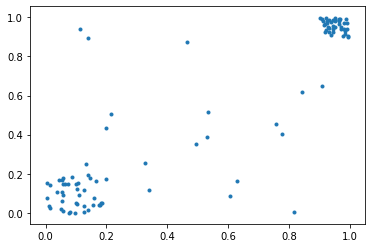

In [525]:
def simple_data_generator(size, random_state=None):
    np.random.seed(random_state)
    return np.random.random(size=(size, 2))

def data_generator(size = N_SAMPLES, density_square=[(0, 0.2, 0, 1)], density=[0.4], random_state=None):
    np.random.seed(random_state)
    gen_data_size = 0
    data=np.array([]).reshape(0,2)
    for d, square in zip(density, density_square):
        if(d > 1):
            print("density must be float in range [0, 1]:", density)
            return
        
        size_i=int(size * d)
        x_data_i = np.random.random(size=(size_i, 1)) * (square[1] - square[0]) + square[0]
        y_data_i = np.random.random(size=(size_i, 1)) * (square[3] - square[2]) + square[2]
        data = np.vstack((data, hstack((x_data_i, y_data_i))))
        #print(data)
        gen_data_size += size_i
    if gen_data_size < size:
        data = np.vstack((data, np.random.random(size=(size-gen_data_size, 2))))
    return data

rand_data=data_generator(100, density_square=[(0, 0.2, 0, 0.2), (0.9, 1, 0.9, 1)], density=[0.4, 0.4])
rand_data
plt.scatter(rand_data[:, 0], rand_data[:, 1], marker='.')

In [526]:
def ApproxPlot(x, y, predict):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    plt.figure(figsize=[11,11])
    plt.scatter(x, y, alpha=0.8, marker=".", label="training points")
    x_approx = np.linspace(0, 1, 1000)
    plt.plot(x_approx, predict (x_approx), c = 'r', linewidth=0.5, label="Approximation curve")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.legend(loc='best')
    plt.show()

In [533]:
class SigmoidRegression:
    def __init__(self):
        pass
    
    def extend_x(self, x):
        if x.shape[0] == x.size:
            x = x.reshape(x.size, 1)
        return np.hstack((x, np.ones((x.shape[0], 1))))
    
    def init_weights(self, size):
        self.w = np.random.random(size=size) #normal(0, 0.1, size = size)

    def sigmoid(self, h):
        return 1 / (1 +  np.exp(-h))

    #LR = 1e-1;

    def predict_proba(self, x):
        #print("x.size, self.w.shape[0], x.shape =", x.size, self.w.shape[0], np.shape(x))
        if x.size == x.shape[0] or x.shape[1] != self.w.shape[0]:
            x = self.extend_x(x)
        return self.sigmoid(x @ self.w)
    
    def get_abs_loss(self, x, y):
        return np.abs(self.predict_proba(x) - y).sum() / x.shape[0]

    def grad_step(self, x, y, lr):
        y_pred  = predict_proba(x)
        self.w -= lr * np.sign(y_pred - y) * (y_pred * (1 - y_pred))
        
    def fit(self, x, y, num_epochs=1000, lr=1):
        losses = []
        x = self.extend_x(x)
        #print("x.shape =", x.shape)
        self.init_weights((x.shape[1], y.shape[1]))
        #print("w.shape =", self.w.shape)
        
        for _ in range(num_epochs):
            y_pred  = self.predict_proba(x)
            #print("y_pred.shape =", y_pred.shape)
            self.w -= lr * x.T @ (np.sign(y_pred - y) * (y_pred * (1 - y_pred))) / x.shape[0]
            #print(self.w)
            losses.append(self.get_abs_loss(x, y))
        #print("self.w =", self.w)
        return losses


In [534]:
sg = SigmoidRegression()
losses = sg.fit(rand_data[:, 0].reshape(rand_data.shape[0], 1), rand_data[:, 1].reshape(rand_data.shape[0], 1),
                num_epochs=1000, lr=1)
print("min loss =", min(losses))

self.w = [[ 6.11932038]
 [-3.05758617]]
min loss = 0.10593952666799733


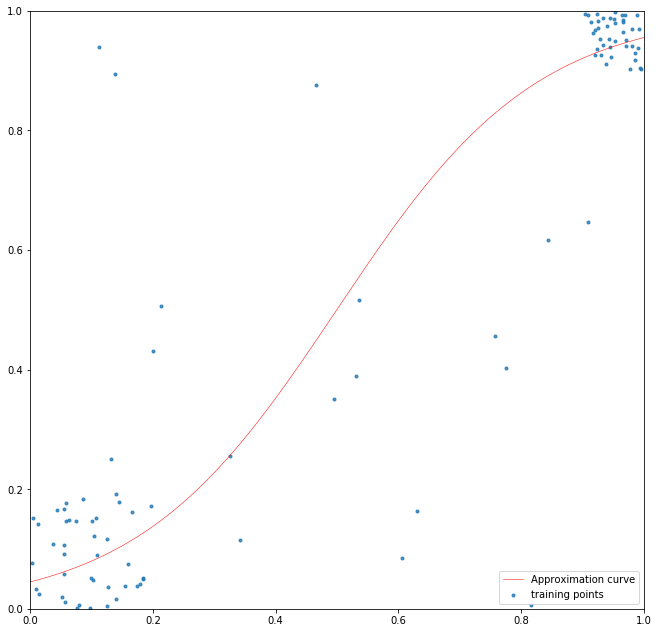

In [535]:
ApproxPlot(rand_data[:, 0], rand_data[:, 1], sg.predict_proba)
#plt.figure(figsize=[10,10])
#plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.8, marker=".")
#plt.plot(np.linspace(0, 1, 1000), sg.predict_proba(np.linspace(0, 1, 1000).reshape(1000, 1)), c = 'r', linewidth=0.5)

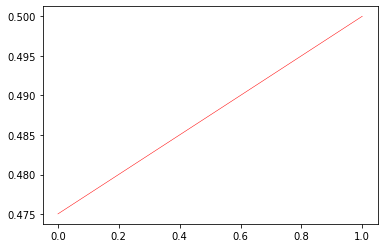

In [12]:
def sigmoid(h):
    return 1 / (1 + np.exp(-(0.1*h-0.1)))
plt.plot(np.linspace(0, 1, 1000), sigmoid(np.linspace(0, 1, 1000)), c = 'r', linewidth=0.5)

### We need sigmoid, that starts on (0,0) and ends on (1,1), therefore w-b = 10 (in exponent in sigmoid)

In [574]:
class SigmoidRegression2:
    def __init__(self):
        pass
    
    def extend_x(self, x):
        if x.shape[0] == x.size:
            x = x.reshape(x.size, 1)
        return np.hstack((x, np.ones((x.shape[0], 1))))
    
    def init_weights(self, size, prec=10):
        slope     = np.random.random(size=(size[0]-1, size[1])) + prec
        intercept = slope[0,:] - prec
        self.w = np.vstack( (slope, intercept) )  #normal(0, 0.1, size = size)

    def sigmoid(self, h):
        return 1 / (1 +  np.exp(-h))

    #LR = 1e-1;

    def predict_proba(self, x):
        #print("x.size, self.w.shape[0], x.shape =", x.size, self.w.shape[0], np.shape(x))
        if x.size == x.shape[0] or x.shape[1] != self.w.shape[0]:
            x = self.extend_x(x)
        return self.sigmoid(x @ self.w)
    
    def get_abs_loss(self, x, y):
        return np.abs(self.predict_proba(x) - y).sum() / x.shape[0]

    def grad_step(self, x, y, lr):
        y_pred  = predict_proba(x)
        self.w -= lr * np.sign(y_pred - y) * (y_pred * (1 - y_pred))
        
    def fit(self, x, y, num_epochs=1000, lr=1, prec=10):
        losses = []
        x = self.extend_x(x)
        #print("x.shape =", x.shape)
        self.init_weights((x.shape[1], y.shape[1]), prec)
        #print("w.shape =", self.w.shape)
        
        for _ in range(num_epochs):
            y_pred  = self.predict_proba(x)
            #print("y_pred.shape =", y_pred.shape)
            grad_id = np.random.randint(0, 2)
            self.w -= (lr * x.T @ (np.sign(y_pred - y) * (y_pred * (1 - y_pred))) / x.shape[0])[grad_id]
            print("self.w =", self.w)
            print("grad =", (lr * x.T @ (np.sign(y_pred - y) * (y_pred * (1 - y_pred))) / x.shape[0])[grad_id])
            losses.append(self.get_abs_loss(x, y))
        print("self.w =", self.w)
        return losses


In [575]:
sg2 = SigmoidRegression2()
losses2 = sg2.fit(data_scaled[:, 0].reshape(N_SAMPLES, 1), data_scaled[:, 1].reshape(N_SAMPLES, 1), num_epochs=5000, lr=2)
for i in range(0, len(losses2), 10):
    print(losses2[i])
print("min =", min(losses2))

self.w = [[10.4362736]
 [ 0.4362736]]
grad = [0.00299624]
self.w = [[10.43326525]
 [ 0.43326525]]
grad = [0.00300836]
self.w = [[10.41534397]
 [ 0.41534397]]
grad = [0.01792128]
self.w = [[10.4122496]
 [ 0.4122496]]
grad = [0.00309437]
self.w = [[10.40914231]
 [ 0.40914231]]
grad = [0.00310729]
self.w = [[10.3909054]
 [ 0.3909054]]
grad = [0.01823691]
self.w = [[10.37242601]
 [ 0.37242601]]
grad = [0.01847939]
self.w = [[10.36914766]
 [ 0.36914766]]
grad = [0.00327835]
self.w = [[10.36585481]
 [ 0.36585481]]
grad = [0.00329284]
self.w = [[10.36254736]
 [ 0.36254736]]
grad = [0.00330745]
self.w = [[10.34368411]
 [ 0.34368411]]
grad = [0.01886325]
self.w = [[10.3245608]
 [ 0.3245608]]
grad = [0.01912331]
self.w = [[10.30516988]
 [ 0.30516988]]
grad = [0.01939093]
self.w = [[10.30158145]
 [ 0.30158145]]
grad = [0.00358842]
self.w = [[10.28186351]
 [ 0.28186351]]
grad = [0.01971794]
self.w = [[10.2618601]
 [ 0.2618601]]
grad = [0.02000341]
self.w = [[10.24156237]
 [ 0.24156237]]
grad = [0.

self.w = [[ 5.98133757]
 [-4.01866243]]
grad = [-0.01336099]
self.w = [[ 5.9964818]
 [-4.0035182]]
grad = [-0.01514422]
self.w = [[ 6.01365206]
 [-3.98634794]]
grad = [-0.01717026]
self.w = [[ 6.03312377]
 [-3.96687623]]
grad = [-0.01947171]
self.w = [[ 6.05520843]
 [-3.94479157]]
grad = [-0.02208465]
self.w = [[ 6.02592542]
 [-3.97407458]]
grad = [0.029283]
self.w = [[ 6.04704393]
 [-3.95295607]]
grad = [-0.0211185]
self.w = [[ 6.01705083]
 [-3.98294917]]
grad = [0.0299931]
self.w = [[ 5.99785942]
 [-4.00214058]]
grad = [0.01919141]
self.w = [[ 5.97702474]
 [-4.02297526]]
grad = [0.02083468]
self.w = [[ 5.99159286]
 [-4.00840714]]
grad = [-0.01456812]
self.w = [[ 6.00810859]
 [-3.99189141]]
grad = [-0.01651573]
self.w = [[ 6.02683689]
 [-3.97316311]]
grad = [-0.0187283]
self.w = [[ 6.04807772]
 [-3.95192228]]
grad = [-0.02124083]
self.w = [[ 6.01817448]
 [-3.98182552]]
grad = [0.02990324]
self.w = [[ 6.03825288]
 [-3.96174712]]
grad = [-0.0200784]
self.w = [[ 6.06102598]
 [-3.93897402

self.w = [[ 6.05328167]
 [-3.94671833]]
grad = [-0.00427122]
self.w = [[ 6.05813363]
 [-3.94186637]]
grad = [-0.00485196]
self.w = [[ 6.02910527]
 [-3.97089473]]
grad = [0.02902836]
self.w = [[ 6.05065056]
 [-3.94934944]]
grad = [-0.02154528]
self.w = [[ 6.05514473]
 [-3.94485527]]
grad = [-0.00449417]
self.w = [[ 6.06025011]
 [-3.93974989]]
grad = [-0.00510538]
self.w = [[ 6.0660503]
 [-3.9339497]]
grad = [-0.00580019]
self.w = [[ 6.05298892]
 [-3.94701108]]
grad = [0.01306138]
self.w = [[ 6.05780106]
 [-3.94219894]]
grad = [-0.00481214]
self.w = [[ 6.02874374]
 [-3.97125626]]
grad = [0.02905731]
self.w = [[ 6.05024051]
 [-3.94975949]]
grad = [-0.02149676]
self.w = [[ 6.02052531]
 [-3.97947469]]
grad = [0.0297152]
self.w = [[ 6.00163173]
 [-3.99836827]]
grad = [0.01889357]
self.w = [[ 5.98111975]
 [-4.01888025]]
grad = [0.02051198]
self.w = [[ 5.99623487]
 [-4.00376513]]
grad = [-0.01511512]
self.w = [[ 5.97526128]
 [-4.02473872]]
grad = [0.02097359]
self.w = [[ 5.98959397]
 [-4.01040

self.w = [[ 5.96310078]
 [-4.03689922]]
grad = [0.02193055]
self.w = [[ 5.97581222]
 [-4.02418778]]
grad = [-0.01271144]
self.w = [[ 5.99021846]
 [-4.00978154]]
grad = [-0.01440623]
self.w = [[ 5.96873073]
 [-4.03126927]]
grad = [0.02148773]
self.w = [[ 5.94541182]
 [-4.05458818]]
grad = [0.02331891]
self.w = [[ 5.97574609]
 [-4.02425391]]
grad = [-0.03033427]
self.w = [[ 5.95302405]
 [-4.04697595]]
grad = [0.02272204]
self.w = [[ 5.98437686]
 [-4.01562314]]
grad = [-0.03135281]
self.w = [[ 5.99992733]
 [-4.00007267]]
grad = [-0.01555046]
self.w = [[ 5.97926952]
 [-4.02073048]]
grad = [0.02065781]
self.w = [[ 5.99413744]
 [-4.00586256]]
grad = [-0.01486792]
self.w = [[ 6.01099379]
 [-3.98900621]]
grad = [-0.01685635]
self.w = [[ 6.03010897]
 [-3.96989103]]
grad = [-0.01911518]
self.w = [[ 6.05178897]
 [-3.94821103]]
grad = [-0.02168]
self.w = [[ 6.02220845]
 [-3.97779155]]
grad = [0.02958053]
self.w = [[ 6.04282813]
 [-3.95717187]]
grad = [-0.02061968]
self.w = [[ 6.01246879]
 [-3.9875

self.w = [[ 5.96194981]
 [-4.03805019]]
grad = [-0.0287073]
self.w = [[ 5.93805502]
 [-4.06194498]]
grad = [0.02389478]
self.w = [[ 5.96740549]
 [-4.03259451]]
grad = [-0.02935047]
self.w = [[ 5.98069037]
 [-4.01930963]]
grad = [-0.01328488]
self.w = [[ 5.99574811]
 [-4.00425189]]
grad = [-0.01505774]
self.w = [[ 6.01282012]
 [-3.98717988]]
grad = [-0.01707201]
self.w = [[ 6.03218025]
 [-3.96781975]]
grad = [-0.01936013]
self.w = [[ 6.01428622]
 [-3.98571378]]
grad = [0.01789403]
self.w = [[ 6.03384299]
 [-3.96615701]]
grad = [-0.01955678]
self.w = [[ 6.05602418]
 [-3.94397582]]
grad = [-0.02218119]
self.w = [[ 6.06124922]
 [-3.93875078]]
grad = [-0.00522504]
self.w = [[ 6.03249221]
 [-3.96750779]]
grad = [0.02875701]
self.w = [[ 6.01462494]
 [-3.98537506]]
grad = [0.01786727]
self.w = [[ 5.99522562]
 [-4.00477438]]
grad = [0.01939932]
self.w = [[ 5.97416574]
 [-4.02583426]]
grad = [0.02105987]
self.w = [[ 5.98835221]
 [-4.01164779]]
grad = [-0.01418647]
self.w = [[ 6.00443432]
 [-3.99

 [-3.97887542]]
grad = [-0.01805308]
self.w = [[ 6.00228238]
 [-3.99771762]]
grad = [0.01884219]
self.w = [[ 6.02022972]
 [-3.97977028]]
grad = [-0.01794733]
self.w = [[ 6.00131081]
 [-3.99868919]]
grad = [0.01891891]
self.w = [[ 6.01912795]
 [-3.98087205]]
grad = [-0.01781714]
self.w = [[ 6.00011458]
 [-3.99988542]]
grad = [0.01901337]
self.w = [[ 5.9794728]
 [-4.0205272]]
grad = [0.02064179]
self.w = [[ 5.95706823]
 [-4.04293177]]
grad = [0.02240456]
self.w = [[ 5.93275957]
 [-4.06724043]]
grad = [0.02430866]
self.w = [[ 5.91976152]
 [-4.08023848]]
grad = [0.01299805]
self.w = [[ 5.94666925]
 [-4.05333075]]
grad = [-0.02690773]
self.w = [[ 5.97717173]
 [-4.02282827]]
grad = [-0.03050248]
self.w = [[ 5.95457111]
 [-4.04542889]]
grad = [0.02260062]
self.w = [[ 5.98613098]
 [-4.01386902]]
grad = [-0.03155987]
self.w = [[ 5.96429427]
 [-4.03570573]]
grad = [0.02183671]
self.w = [[ 5.97716465]
 [-4.02283535]]
grad = [-0.01287037]
self.w = [[ 5.95456342]
 [-4.04543658]]
grad = [0.02260123]

self.w = [[ 5.93946653]
 [-4.06053347]]
grad = [0.02378437]
self.w = [[ 5.9270392]
 [-4.0729608]]
grad = [0.01242733]
self.w = [[ 5.91355493]
 [-4.08644507]]
grad = [0.01348427]
self.w = [[ 5.93963542]
 [-4.06036458]]
grad = [-0.02608049]
self.w = [[ 5.92722247]
 [-4.07277753]]
grad = [0.01241295]
self.w = [[ 5.95512574]
 [-4.04487426]]
grad = [-0.02790327]
self.w = [[ 5.9440331]
 [-4.0559669]]
grad = [0.01109265]
self.w = [[ 5.93199471]
 [-4.06800529]]
grad = [0.01203839]
self.w = [[ 5.91893161]
 [-4.08106839]]
grad = [0.01306309]
self.w = [[ 5.90475923]
 [-4.09524077]]
grad = [0.01417239]
self.w = [[ 5.92966904]
 [-4.07033096]]
grad = [-0.02490981]
self.w = [[ 5.91640824]
 [-4.08359176]]
grad = [0.0132608]
self.w = [[ 5.94286892]
 [-4.05713108]]
grad = [-0.02646068]
self.w = [[ 5.93073135]
 [-4.06926865]]
grad = [0.01213757]
self.w = [[ 5.95910319]
 [-4.04089681]]
grad = [-0.02837184]
self.w = [[ 5.93496698]
 [-4.06503302]]
grad = [0.02413621]
self.w = [[ 5.9221567]
 [-4.0778433]]
gr

self.w = [[ 5.98461682]
 [-4.01538318]]
grad = [-0.01374678]
self.w = [[ 5.96265091]
 [-4.03734909]]
grad = [0.02196591]
self.w = [[ 5.93881562]
 [-4.06118438]]
grad = [0.02383529]
self.w = [[ 5.92633287]
 [-4.07366713]]
grad = [0.01248275]
self.w = [[ 5.91278861]
 [-4.08721139]]
grad = [0.01354426]
self.w = [[ 5.89809572]
 [-4.10190428]]
grad = [0.01469288]
self.w = [[ 5.8821615]
 [-4.1178385]]
grad = [0.01593423]
self.w = [[ 5.92280318]
 [-4.07719682]]
grad = [-0.04064168]
self.w = [[ 5.90895923]
 [-4.09104077]]
grad = [0.01384395]
self.w = [[ 5.89394231]
 [-4.10605769]]
grad = [0.01501692]
self.w = [[ 5.93623246]
 [-4.06376754]]
grad = [-0.04229015]
self.w = [[ 5.96533931]
 [-4.03466069]]
grad = [-0.02910685]
self.w = [[ 5.97834889]
 [-4.02165111]]
grad = [-0.01300957]
self.w = [[ 5.99309384]
 [-4.00690616]]
grad = [-0.01474495]
self.w = [[ 6.00981048]
 [-3.99018952]]
grad = [-0.01671664]
self.w = [[ 5.98999869]
 [-4.01000131]]
grad = [0.01981179]
self.w = [[ 5.96849219]
 [-4.031507

self.w = [[ 6.0349044]
 [-3.9650956]]
grad = [-0.01968231]
self.w = [[ 6.05722805]
 [-3.94277195]]
grad = [-0.02232366]
self.w = [[ 6.0626169]
 [-3.9373831]]
grad = [-0.00538885]
self.w = [[ 6.03397904]
 [-3.96602096]]
grad = [0.02863786]
self.w = [[ 6.01623932]
 [-3.98376068]]
grad = [0.01773972]
self.w = [[ 6.03605809]
 [-3.96394191]]
grad = [-0.01981878]
self.w = [[ 6.05853661]
 [-3.94146339]]
grad = [-0.02247851]
self.w = [[ 6.02954334]
 [-3.97045666]]
grad = [0.02899327]
self.w = [[ 6.01142312]
 [-3.98857688]]
grad = [0.01812022]
self.w = [[ 6.03059588]
 [-3.96940412]]
grad = [-0.01917276]
self.w = [[ 6.01256595]
 [-3.98743405]]
grad = [0.01802994]
self.w = [[ 6.03189198]
 [-3.96810802]]
grad = [-0.01932603]
self.w = [[ 6.01397322]
 [-3.98602678]]
grad = [0.01791876]
self.w = [[ 6.03348801]
 [-3.96651199]]
grad = [-0.01951479]
self.w = [[ 6.01570617]
 [-3.98429383]]
grad = [0.01778185]
self.w = [[ 6.03545342]
 [-3.96454658]]
grad = [-0.01974725]
self.w = [[ 6.01784018]
 [-3.982159

 [-4.03734398]]
grad = [0.02196551]
self.w = [[ 5.93882116]
 [-4.06117884]]
grad = [0.02383486]
self.w = [[ 5.96827405]
 [-4.03172595]]
grad = [-0.02945289]
self.w = [[ 5.94491632]
 [-4.05508368]]
grad = [0.02335773]
self.w = [[ 5.9751843]
 [-4.0248157]]
grad = [-0.03026799]
self.w = [[ 5.95241443]
 [-4.04758557]]
grad = [0.02276988]
self.w = [[ 5.94109051]
 [-4.05890949]]
grad = [0.01132392]
self.w = [[ 5.92880147]
 [-4.07119853]]
grad = [0.01228904]
self.w = [[ 5.91546693]
 [-4.08453307]]
grad = [0.01333454]
self.w = [[ 5.90100088]
 [-4.09899912]]
grad = [0.01446605]
self.w = [[ 5.92541113]
 [-4.07458887]]
grad = [-0.02441025]
self.w = [[ 5.9530726]
 [-4.0469274]]
grad = [-0.02766147]
self.w = [[ 5.94180482]
 [-4.05819518]]
grad = [0.01126778]
self.w = [[ 5.92957661]
 [-4.07042339]]
grad = [0.01222821]
self.w = [[ 5.95779423]
 [-4.04220577]]
grad = [-0.02821761]
self.w = [[ 5.96979956]
 [-4.03020044]]
grad = [-0.01200533]
self.w = [[ 5.94657152]
 [-4.05342848]]
grad = [0.02322804]
se

grad = [-0.00391684]
self.w = [[ 6.05476862]
 [-3.94523138]]
grad = [-0.00444916]
self.w = [[ 6.02544734]
 [-3.97455266]]
grad = [0.02932128]
self.w = [[ 6.00697582]
 [-3.99302418]]
grad = [0.01847152]
self.w = [[ 6.02555224]
 [-3.97444776]]
grad = [-0.01857642]
self.w = [[ 6.00708972]
 [-3.99291028]]
grad = [0.01846252]
self.w = [[ 5.98704492]
 [-4.01295508]]
grad = [0.02004479]
self.w = [[ 6.00295217]
 [-3.99704783]]
grad = [-0.01590724]
self.w = [[ 6.02098926]
 [-3.97901074]]
grad = [-0.01803709]
self.w = [[ 6.00213547]
 [-3.99786453]]
grad = [0.01885379]
self.w = [[ 6.02006311]
 [-3.97993689]]
grad = [-0.01792765]
self.w = [[ 6.00112992]
 [-3.99887008]]
grad = [0.0189332]
self.w = [[ 5.980575]
 [-4.019425]]
grad = [0.02055492]
self.w = [[ 5.99561732]
 [-4.00438268]]
grad = [-0.01504233]
self.w = [[ 5.97459094]
 [-4.02540906]]
grad = [0.02102639]
self.w = [[ 5.98883415]
 [-4.01116585]]
grad = [-0.01424321]
self.w = [[ 5.9672282]
 [-4.0327718]]
grad = [0.02160595]
self.w = [[ 5.98048

grad = [-0.04186083]
self.w = [[ 5.91973651]
 [-4.08026349]]
grad = [0.01300001]
self.w = [[ 5.90563238]
 [-4.09436762]]
grad = [0.01410413]
self.w = [[ 5.93065832]
 [-4.06934168]]
grad = [-0.02502593]
self.w = [[ 5.9590204]
 [-4.0409796]]
grad = [-0.02836208]
self.w = [[ 5.93487717]
 [-4.06512283]]
grad = [0.02414322]
self.w = [[ 5.9638029]
 [-4.0361971]]
grad = [-0.02892573]
self.w = [[ 5.97660784]
 [-4.02339216]]
grad = [-0.01280494]
self.w = [[ 5.95395918]
 [-4.04604082]]
grad = [0.02264865]
self.w = [[ 5.94276702]
 [-4.05723298]]
grad = [0.01119216]
self.w = [[ 5.93062077]
 [-4.06937923]]
grad = [0.01214625]
self.w = [[ 5.95897784]
 [-4.04102216]]
grad = [-0.02835707]
self.w = [[ 5.97114059]
 [-4.02885941]]
grad = [-0.01216275]
self.w = [[ 5.98492345]
 [-4.01507655]]
grad = [-0.01378286]
self.w = [[ 6.00054699]
 [-3.99945301]]
grad = [-0.01562354]
self.w = [[ 6.0182618]
 [-3.9817382]]
grad = [-0.0177148]
self.w = [[ 6.03835191]
 [-3.96164809]]
grad = [-0.02009012]
self.w = [[ 6.06

grad = [0.01894482]
self.w = [[ 5.98041513]
 [-4.01958487]]
grad = [0.02056752]
self.w = [[ 5.95809089]
 [-4.04190911]]
grad = [0.02232424]
self.w = [[ 5.97013567]
 [-4.02986433]]
grad = [-0.01204478]
self.w = [[ 5.94693621]
 [-4.05306379]]
grad = [0.02319946]
self.w = [[ 5.9774744]
 [-4.0225256]]
grad = [-0.03053819]
self.w = [[ 5.99210257]
 [-4.00789743]]
grad = [-0.01462817]
self.w = [[ 6.00868652]
 [-3.99131348]]
grad = [-0.01658395]
self.w = [[ 5.98877847]
 [-4.01122153]]
grad = [0.01990805]
self.w = [[ 6.0049176]
 [-3.9950824]]
grad = [-0.01613914]
self.w = [[ 6.02321812]
 [-3.97678188]]
grad = [-0.01830051]
self.w = [[ 6.04397329]
 [-3.95602671]]
grad = [-0.02075517]
self.w = [[ 6.0137134]
 [-3.9862866]]
grad = [0.03025989]
self.w = [[ 5.99423597]
 [-4.00576403]]
grad = [0.01947743]
self.w = [[ 5.97309151]
 [-4.02690849]]
grad = [0.02114447]
self.w = [[ 5.98713462]
 [-4.01286538]]
grad = [-0.01404312]
self.w = [[ 6.00305387]
 [-3.99694613]]
grad = [-0.01591924]
self.w = [[ 6.021

 [-4.0331233]]
grad = [-0.02928812]
self.w = [[ 5.94340023]
 [-4.05659977]]
grad = [0.02347647]
self.w = [[ 5.97346543]
 [-4.02653457]]
grad = [-0.0300652]
self.w = [[ 5.98755844]
 [-4.01244156]]
grad = [-0.01409301]
self.w = [[ 5.96584358]
 [-4.03415642]]
grad = [0.02171486]
self.w = [[ 5.94227934]
 [-4.05772066]]
grad = [0.02356423]
self.w = [[ 5.97219463]
 [-4.02780537]]
grad = [-0.02991529]
self.w = [[ 5.9861181]
 [-4.0138819]]
grad = [-0.01392346]
self.w = [[ 5.96428029]
 [-4.03571971]]
grad = [0.02183781]
self.w = [[ 5.9405833]
 [-4.0594167]]
grad = [0.02369699]
self.w = [[ 5.92825106]
 [-4.07174894]]
grad = [0.01233224]
self.w = [[ 5.91486975]
 [-4.08513025]]
grad = [0.01338131]
self.w = [[ 5.90035311]
 [-4.09964689]]
grad = [0.01451664]
self.w = [[ 5.9246773]
 [-4.0753227]]
grad = [-0.02432419]
self.w = [[ 5.91099245]
 [-4.08900755]]
grad = [0.01368486]
self.w = [[ 5.89614753]
 [-4.10385247]]
grad = [0.01484492]
self.w = [[ 5.93874649]
 [-4.06125351]]
grad = [-0.04259896]
self.

grad = [0.02250623]
self.w = [[ 5.94473616]
 [-4.05526384]]
grad = [0.01103738]
self.w = [[ 5.97498005]
 [-4.02501995]]
grad = [-0.03024389]
self.w = [[ 5.95219278]
 [-4.04780722]]
grad = [0.02278727]
self.w = [[ 5.98343434]
 [-4.01656566]]
grad = [-0.03124156]
self.w = [[ 5.99885881]
 [-4.00114119]]
grad = [-0.01542446]
self.w = [[ 5.9781096]
 [-4.0218904]]
grad = [0.02074921]
self.w = [[ 5.95558888]
 [-4.04441112]]
grad = [0.02252072]
self.w = [[ 5.94453574]
 [-4.05546426]]
grad = [0.01105313]
self.w = [[ 5.97475282]
 [-4.02524718]]
grad = [-0.03021708]
self.w = [[ 5.98901764]
 [-4.01098236]]
grad = [-0.01426482]
self.w = [[ 5.96742736]
 [-4.03257264]]
grad = [0.02159028]
self.w = [[ 5.94399768]
 [-4.05600232]]
grad = [0.02342968]
self.w = [[ 5.97414279]
 [-4.02585721]]
grad = [-0.03014511]
self.w = [[ 5.95128425]
 [-4.04871575]]
grad = [0.02285854]
self.w = [[ 5.98240423]
 [-4.01759577]]
grad = [-0.03111998]
self.w = [[ 5.997691]
 [-4.002309]]
grad = [-0.01528677]
self.w = [[ 6.0150

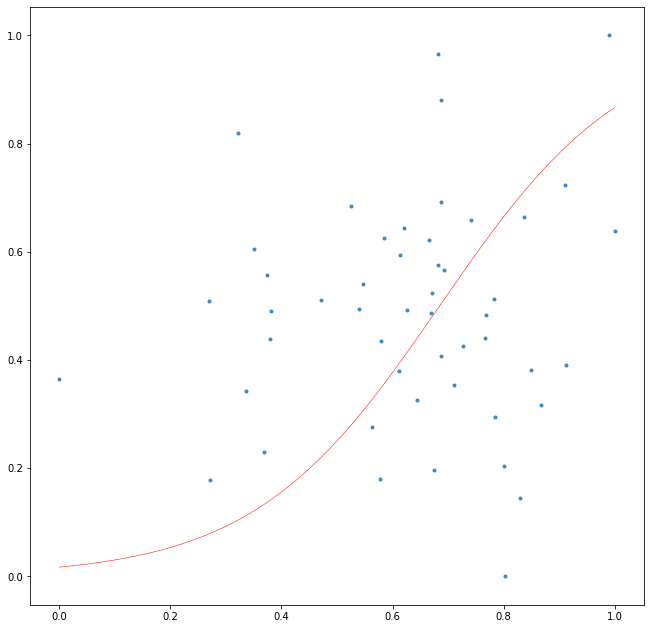

In [576]:
plt.figure(figsize=[11,11])
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.8, marker=".")
plt.plot(np.linspace(0, 1, 1000), sg2.predict_proba(np.linspace(0, 1, 1000).reshape(1000, 1)), c = 'r', linewidth=0.5)

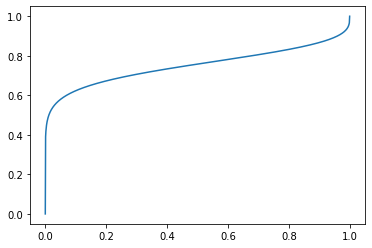

<Figure size 432x288 with 0 Axes>

In [50]:
import numpy as np
from scipy import stats
i = 2
bet = stats.beta(0.1, 0.3)
x = np.linspace(0, 1, 1000)
plt.plot(x, [bet.cdf(x_i) for x_i in x])
plt.show()
plt.savefig("BetaFuc" + str(i))


In [4]:
import torch
torch.cuda.is_available()

False

In [54]:
# 7! * 7! = 25401600
import numpy as np
import time
summ = 0
start = time.time()
for i in np.arange(10e7):
    summ += 1
print(time.time() - start)

15.785487174987793


In [59]:
import numpy as np

a = np.zeros(shape=10)
print(a)
b = a.copy()
b[0] =10
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
